<a href="https://colab.research.google.com/github/SarthakPradhan/Kaggle/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
fashion = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/fashion_mnist/fashion-mnist_train.csv")
fashion_test = pd.read_csv("/content/gdrive/MyDrive/KaggleDatasets/fashion_mnist/fashion-mnist_test.csv")

In [5]:
fashion.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,32.830583,45.731017,52.064083,50.80245,50.459150,53.796217,51.396233,40.432733,26.083333,10.420583,4.079750,1.938183,1.177650,0.857983,0.461133,0.244300,0.092667,0.018333,0.006400,0.020617,0.098967,0.357200,0.767217,2.104583,7.331483,17.472317,32.009017,52.814583,79.349917,...,92.470233,90.523350,79.255767,62.576500,45.753283,43.970183,47.772400,38.841583,22.306933,9.280517,3.955417,0.631000,0.024633,0.218117,1.027250,4.352033,12.568183,20.847967,21.076467,17.152267,22.114933,30.559350,41.743617,51.506583,52.60855,46.479783,42.612733,45.309733,50.162100,46.438617,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,57.633860,65.964300,68.603587,67.86885,67.370188,69.467796,67.912739,62.639596,51.818389,32.591095,20.118496,13.953210,10.718718,9.256114,6.768024,4.953103,2.850576,1.232175,0.548966,1.184869,2.912779,6.523878,9.702476,15.977721,30.056073,47.953585,65.625544,82.122567,95.340204,...,100.912013,99.731484,95.172029,88.844198,78.434831,76.970849,83.212136,74.477031,55.983447,37.937984,24.953295,8.146274,0.968474,4.444904,10.030021,20.912278,36.920905,48.909477,48.263137,42.173000,48.241135,54.902062,61.963606,68.331468,69.76041,67.476669,66.267004,66.737520,68.705817,65.944847,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2

In [55]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fashion, test_size=0.2, random_state=64)

In [7]:
def show_images(imgs, rows):  
  for row in rows:
    img = (imgs.iloc[row].to_numpy().reshape((28,28)))

    plt.imshow(img, interpolation='nearest',cmap="gray")
    plt.show()
        
    

In [8]:
Y_train = train_set.pop("label")
X_train = train_set/255


In [9]:
Y_test = test_set.pop("label")
X_test = test_set/255

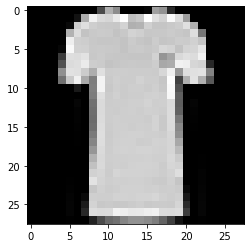

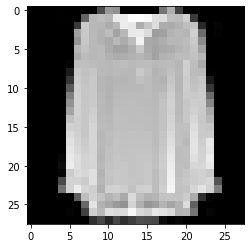

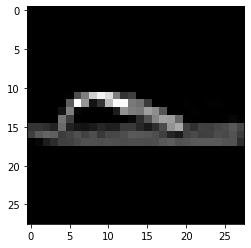

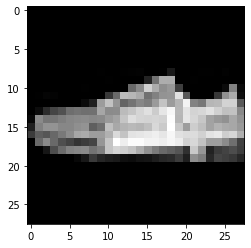

In [10]:
show_images(X_train, [3,2,7,8]);

In [11]:

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(random_state=42)

In [12]:
Y_train

47180    7
33787    4
37345    6
50467    0
5924     7
        ..
49206    3
36006    9
22647    5
21478    3
39364    0
Name: label, Length: 48000, dtype: int64

In [13]:
sgd_clf.predict(X_test)

array([8, 3, 3, ..., 3, 8, 5])

In [14]:
Y_test.values

array([8, 3, 3, ..., 3, 8, 5])

In [15]:
some_digit_scores = sgd_clf.decision_function(X_test)
some_digit_scores

array([[ -3.73601762, -10.59613978,  -9.15911728, ..., -22.94634443,
         10.14807411, -17.53523868],
       [ -2.84957841,  -4.52319533,  -5.69206334, ..., -13.8876859 ,
         -4.87070048, -10.60086292],
       [ -1.02212313,  -2.39480656,  -2.92937178, ..., -13.57145795,
         -5.33505247, -27.21060931],
       ...,
       [ -1.69884912,  -3.01143391,  -6.50119747, ..., -16.82904634,
         -7.25539777,  -4.49267137],
       [ -5.30939634,  -6.12960515,  -8.22898752, ...,  -6.77591676,
         10.48208171, -14.95634995],
       [ -3.23987003,  -5.33278853,  -4.04763212, ...,  -3.06276608,
         -1.13207419, -18.37636352]])

In [16]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.825625 , 0.835375 , 0.8394375])

In [17]:
######## ANN   ###############
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()

In [18]:
X_train.shape  

(48000, 784)

In [19]:
from tensorflow import keras
net = keras.models.Sequential([
keras.layers.Flatten(input_shape=[784,]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [20]:
net.layers

In [21]:
net.layers[1].name

'dense'

In [22]:
weights, biases = net.layers[1].get_weights()

In [23]:
weights.shape

(784, 300)

In [24]:
net.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [25]:
(Y_test.dtype)

dtype('int64')

In [26]:
history = net.fit(X_train, Y_train, epochs=40,validation_data=(X_test, Y_test))

Epoch 1/40
1500/1500 [==============================] - 9s 5ms/step - loss: 0.7397 - accuracy: 0.7586 - val_loss: 0.5398 - val_accuracy: 0.8087
Epoch 2/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5037 - accuracy: 0.8249 - val_loss: 0.4608 - val_accuracy: 0.8394
Epoch 3/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4567 - accuracy: 0.8408 - val_loss: 0.4713 - val_accuracy: 0.8342
Epoch 4/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4301 - accuracy: 0.8504 - val_loss: 0.4169 - val_accuracy: 0.8512
Epoch 5/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4089 - accuracy: 0.8563 - val_loss: 0.4019 - val_accuracy: 0.8565
Epoch 6/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3924 - accuracy: 0.8618 - val_loss: 0.3995 - val_accuracy: 0.8588
Epoch 7/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3781 - accuracy: 0.8670 - val_loss: 0.3964 - val_accuracy:

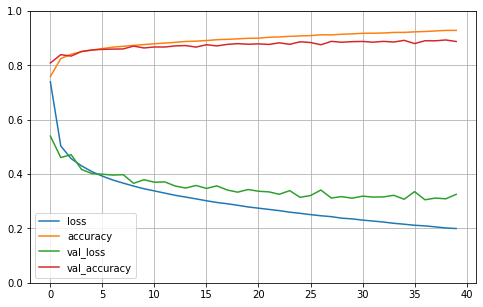

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [28]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_new = X_test[:3]
y_proba = net.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
def show_images(imgs, rows):  
  for row in rows:
    img = (imgs[row].reshape((28,28)))

    plt.imshow(img, interpolation='nearest',cmap="gray")
    plt.show()
        

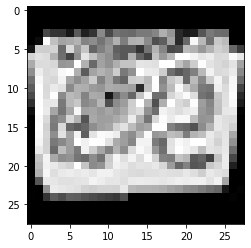

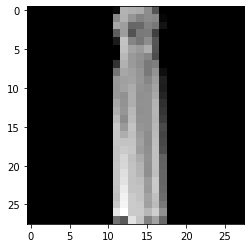

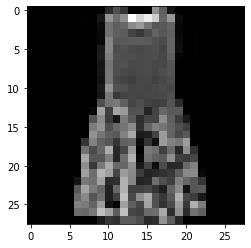

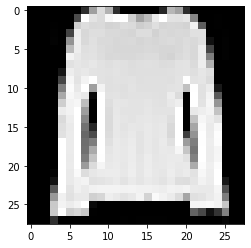

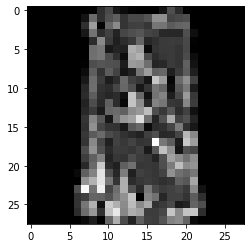

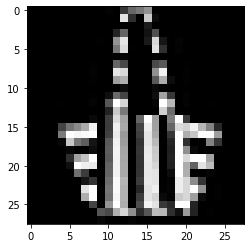

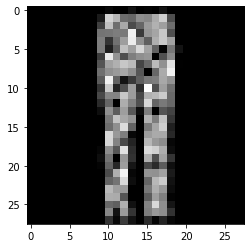

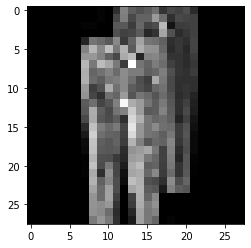

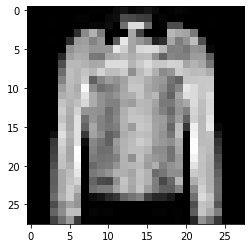

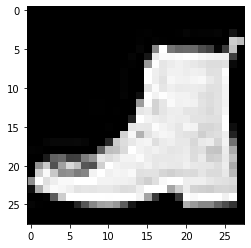

In [52]:
show_images(X_test, [i for i in range(10)]);

In [68]:
y_pred = np.argmax(net.predict(X_test[:10]),axis=1)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [69]:
np.array(class_names)[y_pred]

array(['Bag', 'Dress', 'Dress', 'Shirt', 'T-shirt/top', 'Bag', 'Trouser',
       'Dress', 'Coat', 'Ankle boot'], dtype='<U11')